In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Define dataset directories
train_dir = 'D:/indhu/Datasets/tomato/train'  # Directory with 'ripe' and 'unripe' folders
val_dir = 'D:/indhu/Datasets/tomato/val'

In [3]:

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  # For validation, just rescale

In [4]:

# Load and preprocess the images from the directories
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')  # Ripe or unripe -> binary classification

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                target_size=(150, 150), 
                                                batch_size=32, 
                                                class_mode='binary')

Found 643 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (ripe/unripe)
])


C:\Users\Indhuma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [7]:

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // val_generator.batch_size)


Epoch 1/10


C:\Users\Indhuma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9880 - loss: 0.1261 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10


C:\Users\Indhuma\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - l

In [9]:
# Get predictions from the validation set
val_images, val_labels = next(val_generator)  # Fetch a batch of validation images
predictions = model.predict(val_images)
predictions = (predictions > 0.5).astype(int)  # Convert predictions to binary

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


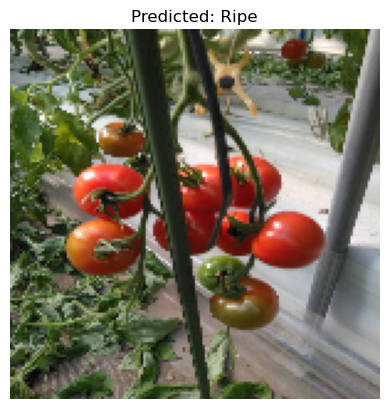

Model's prediction for the selected image: Ripe


In [15]:
# Loop through and display results for a random image from validation
img = random.randint(0, len(val_images) - 1)
plt.imshow(val_images[img])  # Show image
plt.title(f"Predicted: {'Ripe' if predictions[img][0] >= 0 else 'Unripe'}")
plt.axis('off')
plt.show()
print(f"Model's prediction for the selected image: {'Ripe' if predictions[img][0] >= 0 else 'Unripe'}")

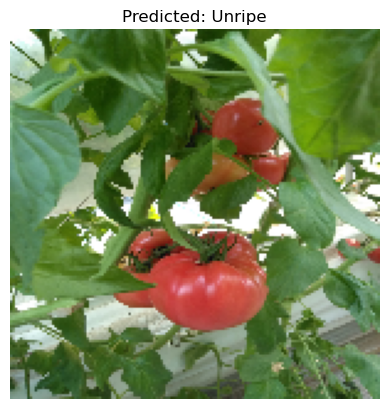

Model's prediction for the selected image: Unripe


In [17]:
# Display a random image from the validation set with its prediction
img = random.randint(0, len(val_images) - 1)
plt.imshow(val_images[img])  # Show image
plt.title(f"Predicted: {'Ripe' if predictions[img][0] == 1 else 'Unripe'}")
plt.axis('off')
plt.show()

# Output prediction
print(f"Model's prediction for the selected image: {'Ripe' if predictions[img][0] == 1 else 'Unripe'}")